In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("./train.csv")

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Analisis exploratorio

Resumen Estadistico


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Valores Nulos


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Distribucion de los Precios de Venta


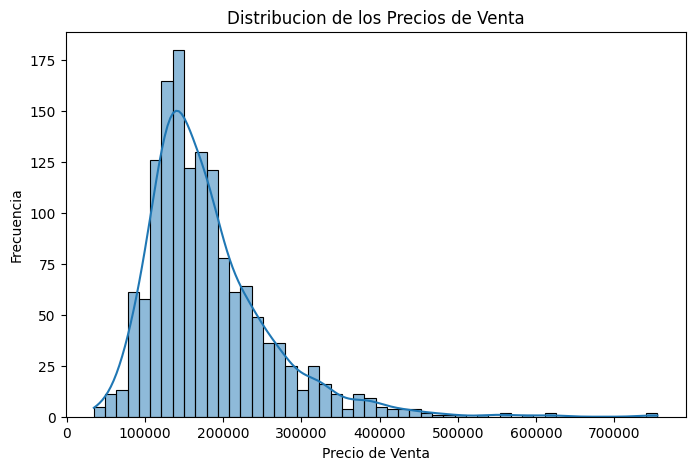

Matriz de Correlacion


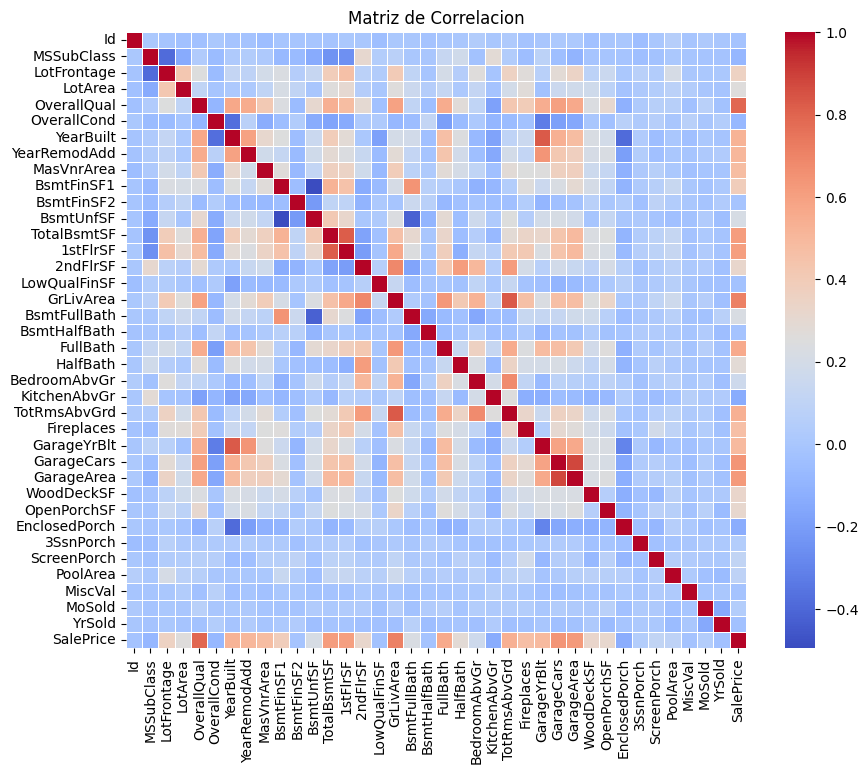

Correlacion con la variable objetivo SalePrice


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Distribucion de algunas variables importantes


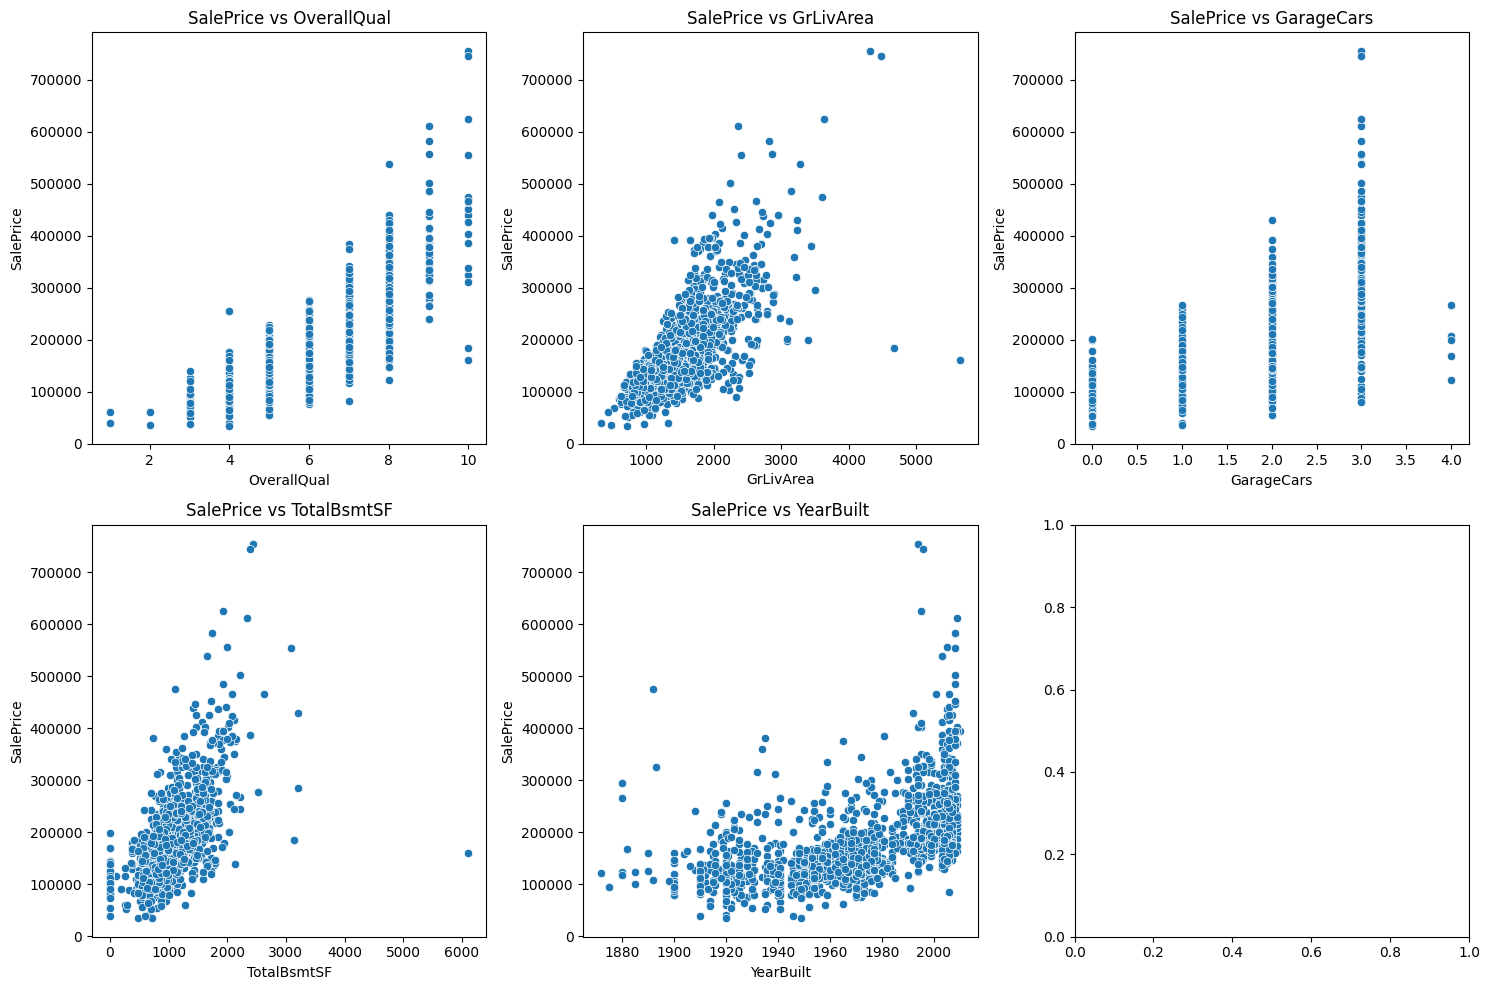

In [4]:
# Resumen estadístico
print("Resumen Estadistico")
display(df.describe())

# Verificar valores nulos
print("Valores Nulos")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
display(missing_values)

# Visualizar la distribución de precios de venta
print("Distribucion de los Precios de Venta")
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title("Distribucion de los Precios de Venta")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Matriz de correlación
print("Matriz de Correlacion")
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Correlacion")
plt.show()

# Correlación con la variable objetivo SalePrice
print("Correlacion con la variable objetivo SalePrice")
correlation_target = correlation_matrix["SalePrice"].sort_values(ascending=False)
display(correlation_target.head(15))

# Distribución de algunas variables importantes
print("Distribucion de algunas variables importantes")
important_vars = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "YearBuilt"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(important_vars):
    sns.scatterplot(x=df[var], y=df["SalePrice"], ax=axes[i])
    axes[i].set_title(f"SalePrice vs {var}")

plt.tight_layout()
plt.show()


### Resumen Estadístico  
El dataset cuenta con 1460 registros y múltiples variables, incluyendo información sobre la calidad, tamaño y año de construcción de las viviendas. El precio de venta (`SalePrice`) tiene una media de **180,921**, con un mínimo de **34,900** y un máximo de **755,000**. La variable muestra una alta dispersión, lo que sugiere una distribución sesgada hacia precios altos.

### Valores Nulos  
Se encontraron variables con valores nulos, principalmente:
- **PoolQC (1453)**, **MiscFeature (1406)** y **Alley (1369)**, indicando que la mayoría de las casas no tienen piscina, características extra o callejón.
- **Fence (1179)** y **FireplaceQu (690)** también tienen muchos valores nulos, lo que sugiere que pocas casas tienen cercas o chimeneas calificadas.
- **LotFrontage (259)** y **GarageType (81)** requieren tratamiento, ya que pueden afectar los modelos predictivos.

### Correlación con `SalePrice`  
Las variables con mayor correlación con el precio de venta son:
- **OverallQual (0.79)**: La calidad general de la vivienda tiene la mayor relación con el precio.
- **GrLivArea (0.71)**: La superficie habitable sobre el suelo también es un fuerte predictor.
- **GarageCars (0.64) y GarageArea (0.62)**: La cantidad y tamaño del garaje tienen una fuerte relación con el valor de la vivienda.
- **TotalBsmtSF (0.61) y 1stFlrSF (0.60)**: El tamaño del sótano y la primera planta también impactan en el precio.


### Preparación de los Datos

In [6]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('None')

df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype('category').cat.codes)

df['PriceCategory'] = pd.qcut(df['SalePrice'], q=3, labels=['Economica', 'Intermedia', 'Cara'])

display(df['PriceCategory'].value_counts())



C:\Users\diego\AppData\Local\Temp\ipykernel_24224\181356893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_24224\181356893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

KeyError: "['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'] not found in axis"